In [1]:
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [2]:
# Load data
data = digits.data
target = digits.target

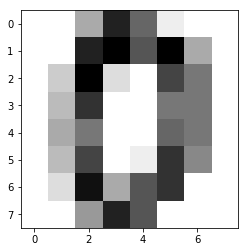

In [3]:
# Plot element n=0 of the data
#print(data[0])
#print(data[0].reshape(8,8))
plt.imshow(data[0].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

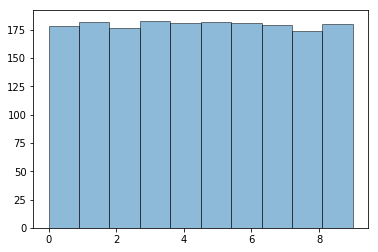

In [4]:
# plot distribution of targets in data
plt.hist(target,alpha=0.5, histtype='bar', ec='black')
plt.show()

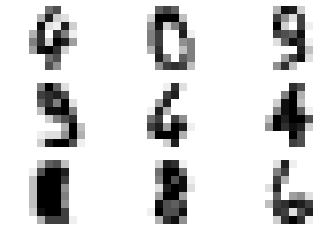

In [5]:
# plot n=9 random elements 

import random

for ii in range(9):
    number = np.array(data[random.randint(0,1200)]).reshape(8,8)
    #print(number)
    plt.subplot(3, 3, ii + 1)
    plt.axis('off')
    plt.imshow(number, cmap=plt.cm.gray_r)
    
plt.show()

In [6]:
## Shuffle data

# generate a list and randomize it
my_list = list(range(1797))
np.random.shuffle(my_list)

# selet random indeces for train and split 
train_list = my_list[:1200]
test_list = my_list[1200:]

# pick elements from dataset according to random indeces
train_data = data[train_list,:]
test_data = data[test_list,:]

train_target = target[train_list]
test_target = target[test_list]

In [7]:
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(train_data,train_target)
predicted = classifier.predict(test_data)

In [8]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_target, predicted))

Confusion matrix:
[[56  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  0 65  0  0  0  0  0  0  0]
 [ 0  0  0 73  0  1  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  1  0]
 [ 0  0  0  0  0 53  1  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  1]
 [ 0  3  0  0  0  0  0  0 53  0]
 [ 0  0  0  0  0  0  0  1  0 57]]


In [9]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_target, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        56
          1       0.96      1.00      0.98        67
          2       1.00      1.00      1.00        65
          3       1.00      0.99      0.99        74
          4       1.00      0.98      0.99        62
          5       0.98      0.98      0.98        54
          6       0.98      1.00      0.99        52
          7       0.98      0.98      0.98        53
          8       0.98      0.95      0.96        56
          9       0.98      0.98      0.98        58

avg / total       0.99      0.99      0.99       597




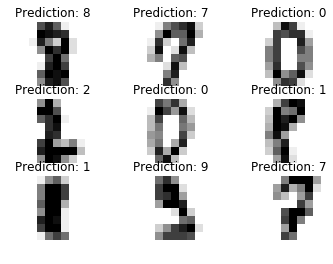

In [10]:
# Verify prediction on n=9 random elements

for ii in range(9):
    jj = random.randint(0, len(test_list))
    test_digit = test_data[jj].reshape(8,8)
    pred_digit = predicted[jj]
    plt.subplot(3, 3, ii + 1)
    plt.axis('off')
    plt.imshow(test_digit, cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % pred_digit)
plt.show()

In [11]:
# Internal tools to estimate prediction

# Model Accuracy: how often is the classifier correct?
accuracy = metrics.accuracy_score(predicted, test_target)
print("Accuracy:", accuracy)

Accuracy: 0.9865996649916248


In [12]:
# Model Precision: what percentage of positive tuples are labeled as such?
precision = metrics.precision_score(predicted, test_target, average=None)

# Model Recall: what percentage of positive tuples are labelled as such?
recall = metrics.recall_score(predicted, test_target, average=None)

for ii,jj,kk in zip(range(10), precision, recall):
    print(ii,jj,kk)

0 1.0 1.0
1 1.0 0.9571428571428572
2 1.0 1.0
3 0.9864864864864865 1.0
4 0.9838709677419355 1.0
5 0.9814814814814815 0.9814814814814815
6 1.0 0.9811320754716981
7 0.9811320754716981 0.9811320754716981
8 0.9464285714285714 0.9814814814814815
9 0.9827586206896551 0.9827586206896551


In [13]:
import pandas as pd

In [14]:
my_dict = {}
for ii,jj,kk in zip(range(10), precision, recall):
    my_dict[ii] = { 'precision' : jj, 'recall' :kk }
my_dict

{0: {'precision': 1.0, 'recall': 1.0},
 1: {'precision': 1.0, 'recall': 0.9571428571428572},
 2: {'precision': 1.0, 'recall': 1.0},
 3: {'precision': 0.9864864864864865, 'recall': 1.0},
 4: {'precision': 0.9838709677419355, 'recall': 1.0},
 5: {'precision': 0.9814814814814815, 'recall': 0.9814814814814815},
 6: {'precision': 1.0, 'recall': 0.9811320754716981},
 7: {'precision': 0.9811320754716981, 'recall': 0.9811320754716981},
 8: {'precision': 0.9464285714285714, 'recall': 0.9814814814814815},
 9: {'precision': 0.9827586206896551, 'recall': 0.9827586206896551}}

In [15]:
pd.DataFrame.from_dict(my_dict)

,0,1,2,3,4,5,6,7,8,9
precision,1.0,1.000000,1.0,0.986486,0.983871,0.981481,1.000000,0.981132,0.946429,0.982759
recall,1.0,0.957143,1.0,1.000000,1.000000,0.981481,0.981132,0.981132,0.981481,0.982759
